# Linear Regression Stock Forecasting
This notebook demonstrates the use of linear regression to forecast stock prices. Using historical stock data, the model is trained to predict future closing prices based on past trends. The notebook includes data visualization of the training and testing data, the line of best fit, and a 50-day forecast. Evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²) are used to assess the model's performance.

## Import Libraries

In [309]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## Get Data

In [310]:
# Define the stock symbol and the date range for our data
stock_symbol = 'NVDA'
start_date = '2024-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Sets end date to today's date
print(f"{stock_symbol}\nStart Date: {start_date}\nEnd Date: {end_date}")

NVDA
Start Date: 2024-01-01
End Date: 2024-12-06


In [311]:
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Select the desired columns (first level of MultiIndex)
df.columns = df.columns.get_level_values(0)

# Keep only the columns you are interested in
df = df[['Close']]

# If the index already contains the dates, rename the index
df.index.name = 'Date'  # Ensure the index is named "Date"
    
# Resetting the index if necessary
df.reset_index(inplace=True)

# Ensure that the index is of type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index again (in case it's reset)
df.set_index('Date', inplace=True)

df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Date,
2024-01-02,48.167999
2024-01-03,47.569000
2024-01-04,47.998001
2024-01-05,49.097000
2024-01-08,52.252998


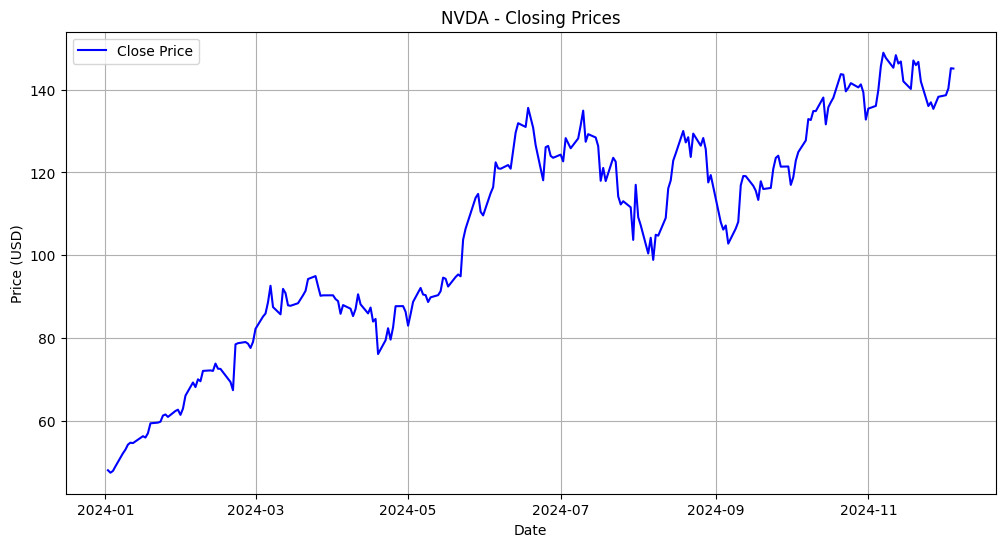

In [312]:
# Plot the original closing prices
plt.figure(figsize=(12, 6))

# Plot the 'Close' price column
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

# Add title and labels
plt.title(f'{stock_symbol} - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Add a legend
plt.legend()

# Add gridlines
plt.grid(True)

plt.savefig(f'{stock_symbol}_closing_prices.png')

# Show the plot
plt.show()


## Prepare Data For Training
In this section, the stock data is prepared for modeling. The index of the data is used as the feature (X), and the closing prices are set as the target variable (y). The dataset is then split into training (80%) and testing (20%) sets to evaluate model performance. A line plot is displayed showing the training and testing data for visual inspection of the split.

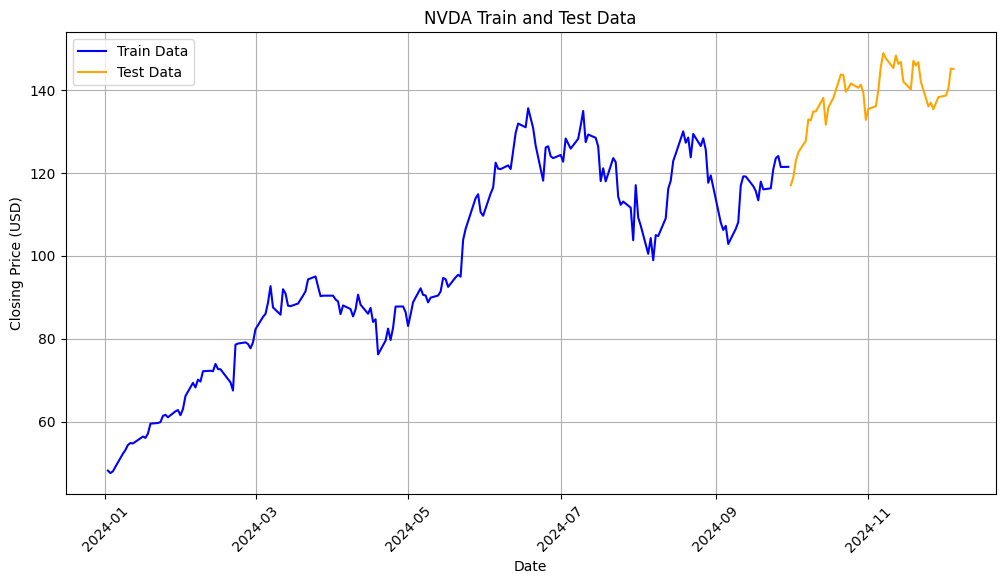

In [313]:
# Prepare the data
X = np.array(range(len(df))).reshape(-1, 1)  # Use the index as the feature (numeric sequence)
y = df['Close'].values  # Closing prices

# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Plot the training and test data as line plots
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(y_train)], y_train, label='Train Data', color='blue')
plt.plot(df.index[len(y_train):], y_test, label='Test Data', color='orange')
plt.title(f'{stock_symbol} Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(f'{stock_symbol}_train_test_data.png')
plt.show()


## Train Linear Regression Model
In this section, a linear regression model is trained using the training data (X_train and y_train). The model learns the relationship between the feature (index) and the target (closing price) to make predictions based on past data.

In [314]:
# Fit the linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Testing
In this section, predictions are made on the test data (X_test) using the trained linear regression model. The model’s performance is then evaluated using key metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²). These metrics help assess the accuracy and goodness-of-fit of the model's predictions on unseen data.

In [315]:
# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)  # R-squared (coefficient of determination)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 42.9656
Mean Absolute Error (MAE): 4.9125
R-squared (R²): 0.1975


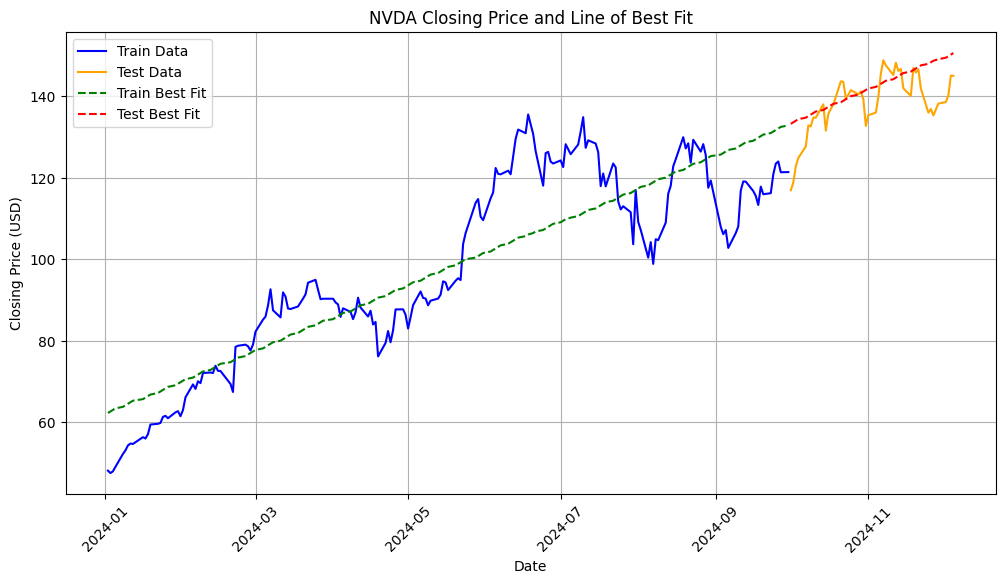

In [316]:
# Make predictions for training and test data
y_pred_train = model.predict(X_train)

# Plot the actual train and test closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(y_train)], y_train, label='Train Data', color='blue')
plt.plot(df.index[len(y_train):], y_test, label='Test Data', color='orange')

# Add the line of best fit for train and test
plt.plot(df.index[:len(y_train)], y_pred_train, label='Train Best Fit', color='green', linestyle='--')
plt.plot(df.index[len(y_train):], y_pred_test, label='Test Best Fit', color='red', linestyle='--')

# Chart details
plt.title(f'{stock_symbol} Closing Price and Line of Best Fit')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(f'{stock_symbol}_train_test_forecast.png')
plt.show()


## Forecast
In this section, the model is used to forecast stock prices for the next 50 days by extending the feature indices beyond the training data. The forecasted values are plotted alongside the actual train and test data, as well as the lines of best fit. The chart visualizes the model’s prediction for the future stock prices, providing insights into the expected trend.

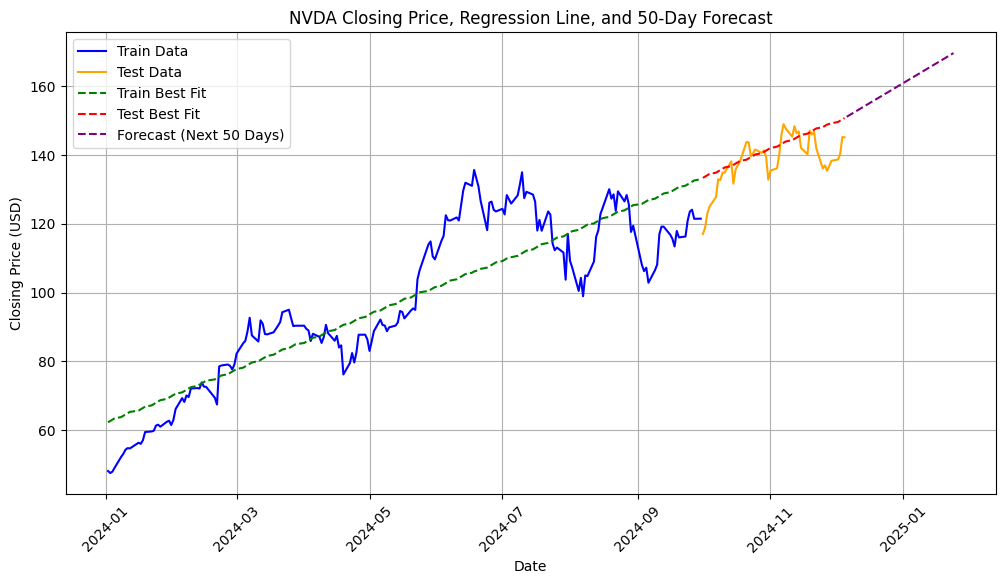

In [317]:
# Prepare the forecast indices (ensure continuity with training data)
X_forecast = np.arange(len(X), len(X) + 50).reshape(-1, 1)  # Continue from the last value of X

# Predict future values
y_forecast = model.predict(X_forecast)

# Plot the train, test, best fit lines, and forecast
plt.figure(figsize=(12, 6))

# Train and Test Actual Data
plt.plot(df.index[:len(y_train)], y_train, label='Train Data', color='blue')
plt.plot(df.index[len(y_train):], y_test, label='Test Data', color='orange')

# Lines of Best Fit
plt.plot(df.index[:len(y_train)], y_pred_train, label='Train Best Fit', color='green', linestyle='--')
plt.plot(df.index[len(y_train):], y_pred_test, label='Test Best Fit', color='red', linestyle='--')

# Forecast for the next 50 days
future_dates = pd.date_range(df.index[-1], periods=50 + 1, freq='D')[1:]  # Generate future dates
plt.plot(future_dates, y_forecast, label='Forecast (Next 50 Days)', color='purple', linestyle='--')

# Chart details
plt.title(f'{stock_symbol} Closing Price, Regression Line, and 50-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(f"{stock_symbol}_forecast.png")
plt.show()
